# Google Job Demands Analysis
Objective: All jobs related to the keyword `software`.

In [335]:
# Make your plot output stored in the notebook.
%matplotlib inline

import sys
sys.path.insert(0, '../modules/')
from fintextmin import *

import nltk
import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

df = pandas.read_csv('google_jobs.csv')
df.head(10)

,title,location,minimum_qual,preferred_qual,responsibilities
0,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBA/BS degree or equivalent pra...,"4 years of relevant work experience, including...",Build next-generation web applications with a ...
1,"Software Engineer, HTML5 Video, Google Cloud P...","Sunnyvale, CA, USA",Qualifications\nBS degree in Electrical Engine...,MS degree in Electrical Engineering or Compute...,"Design, implement and launch complex HTML5 vid..."
2,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBA/BS in Computer Science or r...,Experience with one or more general purpose pr...,"Design, implement and launch highly-visible, p..."
3,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBachelor's degree in Computer ...,Experience working with hardware designers/rea...,Develop the whole software stack for consumer ...
4,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBachelor's degree in a technic...,"Development experience in designing modular, o...",Build next-generation web applications with a ...
5,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nMaster's degree in Electrical ...,PhD degree.\nExperience with wireless protocol...,"Participate in architecting, developing, testi..."
6,Front End Software Engineer,"Pittsburgh, PA, USA","Qualifications\nBS degree in Computer Science,...",10 years of relevant work experience in softwa...,Work alongside the Technical Lead to drive lon...
7,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBachelor's degree in Computer ...,"Master’s degree or PhD in Engineering, Compute...","Design, develop, test, deploy, maintain and im..."
8,"Software Engineer, Infrastructure (English)","Tel Aviv-Yafo, Israel",Qualifications\nBachelor's degree in Computer ...,Master’s degree.\nExperience with Unix/Linux o...,"Design, develop, test, deploy, maintain and im..."
9,Front End Software Engineer,"Pittsburgh, PA, USA",Qualifications\nBA/BS degree in Computer Scien...,"Experience in API design, performance optimiza...","Manage individual project priorities, deadline..."


## 1. Minimum/Preferred Degree Requirements

In [336]:
def count_keywords_freq(df: pandas.DataFrame, col_name: str, keywords: list, case_sensitive=True):
    """ Given a list of keywords and count their frequency in
    the specified pandas dataframe.
    :param d: target pandas dataframe.
    :param col_name: target column name.
    :param keywords: a list of keywords.
    :param case_sensitive: either True or False.
    :return: keyword frequency dict.
    """
    freq_dict = {keyword: 0 for keyword in keywords}
    
    for keyword in keywords:
        freq_dict[keyword] = df['minimum_qual'].str.contains(keyword).sum()
        
    freq_dict['None'] = len(df) - sum(freq_dict.values())
                    
    return freq_dict

In [337]:
keywords = ['PhD', 'Master', 'MBA', 'BA', 'BS', 'Bachelor']

# Count keyword frequency.
min_degree_reqs = count_keywords_freq(df, 'minimum_qual', keywords)
pref_degree_reqs = count_keywords_freq(df, 'preferred_qual', keywords)

print("Minimum: " + str(min_degree_reqs))
print("Preferred: " + str(pref_degree_reqs))

Minimum: {'PhD': 52, 'Master': 31, 'MBA': 20, 'BA': 450, 'BS': 576, 'Bachelor': 838, 'None': -262}
Preferred: {'PhD': 52, 'Master': 31, 'MBA': 20, 'BA': 450, 'BS': 576, 'Bachelor': 838, 'None': -262}


In [4]:
min_degree_df = pandas.DataFrame.from_dict(min_degree_reqs, orient='index', columns=['Count'])
pref_degree_df = pandas.DataFrame.from_dict(pref_degree_reqs, orient='index', columns=['Count'])

min_degree_df

,Count
PhD,52
Master,31
MBA,20
BA,453
BS,577
Bachelor,838
None,210


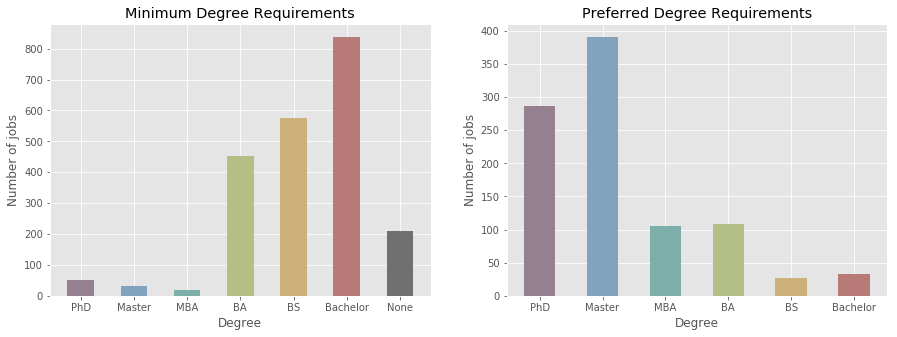

In [5]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(min_degree_reqs.keys())
min_values = list(min_degree_reqs.values())

pref_labels = list(pref_degree_reqs.keys())
pref_values = list(pref_degree_reqs.values())


plt.figure(figsize=(15, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Minimum Degree Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels[:-1], pref_values[:-1], color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Preferred Degree Requirements')

plt.show()

---

## 2. Minimum/Preferred Experience Requirements

In [10]:
def extract_experience(df: pandas.DataFrame, col_name: str, start_year=0, end_year=20):
    """ Extract years of experiences required
    :param df: target dataframe.
    :param col_name: name of the column that contains strings
                     like `4 years of experience in ...`
    :param start_year: the starting year in the list returned.
    :param end_year: the last year in the list returned.
    :return: a list of years of exp required (index by years)
    """
    import re
    
    exp_list = [0] * 21
    
    for col in df[col_name]:
        if type(col) is not str:
            continue
        exp_required = re.findall('\d+ year', col)
        year = 0 if not exp_required else int(exp_required[0].replace(' year', ''))
        exp_list[year] += 1
        
    return exp_list

In [11]:
# Initialize a list with 0 from index 0 to 20.
min_exp_list = extract_experience(df, 'minimum_qual')
pref_exp_list = extract_experience(df, 'preferred_qual')

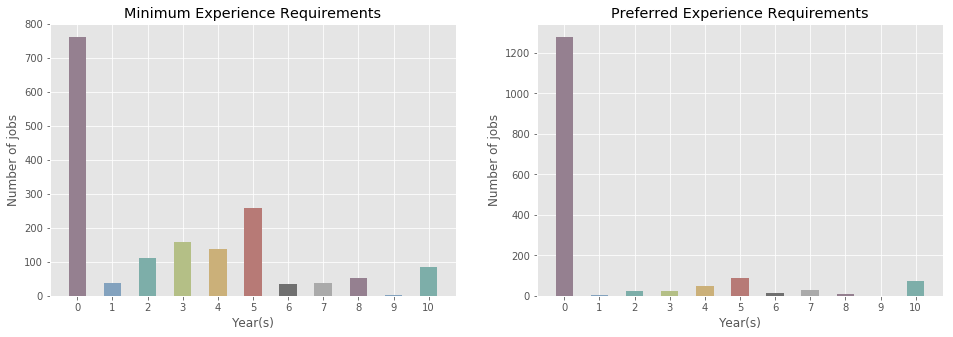

In [12]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']
labels = np.arange(len(min_exp_list))

plt.figure(figsize=(16, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(np.arange(11), min_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Minimum Experience Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(labels[0:11], pref_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Preferred Experience Requirements')

plt.show()

---

## 3. Top 8 Job Titles

In [13]:
jobs_freq = {}

for col in df['title']:
    if type(col) is not str:
        continue
    col = col.split(',')[0]
    if col in jobs_freq:
        jobs_freq[col] += 1
    else:
        jobs_freq[col] = 1
        
jobs_freq = dict(sorted(jobs_freq.items(), key=lambda kv: kv[1], reverse=True))

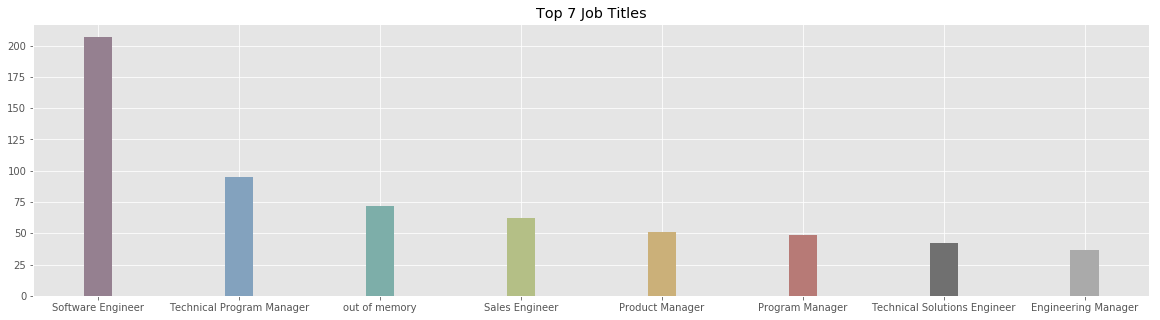

In [14]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(jobs_freq.keys())[0:8]
min_values = list(jobs_freq.values())[0:8]

plt.figure(figsize=(20, 5))
plt.bar(min_labels, min_values, color=colors, width=0.2)
plt.title('Top 7 Job Titles')
plt.show()

## 4. Top 10 Programming Languages

In [165]:
lang_colors = {
    'C++': '#F34B7D',
    'Java': '#B07219',
    'Python': '#3572A5',
    'JavaScript': '#F1E05A',
    'Go': '#375EAB',
    'PHP': '#4F5D95',
    'SQL': '#494D5C',
    'Ruby': '#701516',
    'Swift': '#FFAC45',
    'Kotlin': '#F18E33',
    'C#': '#178600',
    'Objective C': '#438EFF'
}

In [166]:
langs = lang_colors.keys()

# Count keyword frequency.
min_lang_reqs = count_keywords_freq(df, 'minimum_qual', langs)
pref_lang_reqs = count_keywords_freq(df, 'preferred_qual', langs)

del min_lang_reqs['None']
del pref_lang_reqs['None']

# Sort the dicts.
min_lang_reqs = dict(sorted(min_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))
pref_lang_reqs = dict(sorted(pref_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))

# Create DataFrame from dict.
min_lang_df = pandas.DataFrame.from_dict(min_lang_reqs, orient='index', columns=['Count'])
pref_lang_df = pandas.DataFrame.from_dict(pref_lang_reqs, orient='index', columns=['Count'])

pref_lang_reqs

{'Java': 264,
 'Python': 255,
 'Go': 239,
 'JavaScript': 190,
 'SQL': 178,
 'C++': 142,
 'C#': 71,
 'Objective C': 49,
 'PHP': 33,
 'Ruby': 20,
 'Kotlin': 8,
 'Swift': 7}

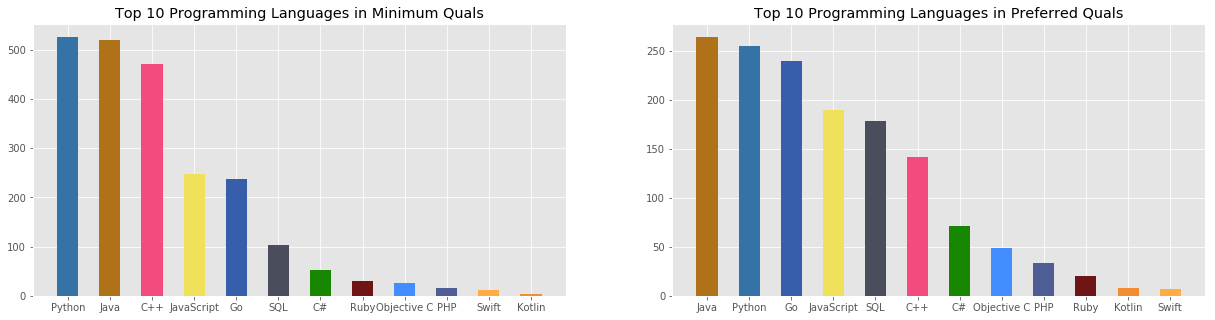

In [167]:
min_labels = list(min_lang_reqs.keys())
min_values = list(min_lang_reqs.values())
min_colors = [lang_colors[k] for k, v in min_lang_reqs.items()]

pref_labels = list(pref_lang_reqs.keys())
pref_values = list(pref_lang_reqs.values())
pref_colors = [lang_colors[k] for k, v in pref_lang_reqs.items()]


plt.figure(figsize=(21, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=min_colors, width=0.5)
plt.title('Top 10 Programming Languages in Minimum Quals')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels, pref_values, color=pref_colors, width=0.5)
plt.title('Top 10 Programming Languages in Preferred Quals')

plt.show()

## 5. Top 5 Most Demanding Skills from Job Descriptions
Extract keywords and create word clouds from the following:
* Minimum Qualifications
* Preferred Qualifications
* Responsibilities

### Word frequency matrix
For each job, we create a  wfm (word frequency matrix) and store all results in a dict.

In [334]:


test_string = df.iloc[1650]['preferred_qual']

tokens = nltk.tokenize.word_tokenize(test_string)

for token in tokens:
    if '/' in token:
        tokens += token.split('/')
        tokens.remove(token)

tokenizer = nltk.tokenize.MWETokenizer(separator=' ')

special_words = [
    ('Objective', 'C'),
    ('Computer', 'Science'),
    ('computer', 'science'),
    ('work', 'experience'),
    ('hands-on', 'experience'),
    ('relevant', 'experience'),
    ('equivalent', 'experience'),
    ('industry', 'experience'),
    ('practical', 'experience'),
    ('Electrical', 'Engineering'),
    ('Web', 'Application'),
    ('Web', 'application'),
    ('web', 'application'),
    ('large', 'software', 'systems'),
    ('next', 'generation'),
    ('back', 'end'),
    ('front', 'end'),
    ('User', 'Interface'),
    ('user', 'interface'),
    ('Software', 'development'),
    ('software', 'development'),
    ('communication', 'skills'),
    ('open', 'source'),
    ('general', 'purpose'),
    ('coding', 'languages'),
    ('coding', 'language'),
    ('programming', 'languages'),
    ('programming', 'language'),
    ('embedded', 'systems'),
    ('embedded', 'system'),
    ('device', 'drivers'),
    ('device', 'driver'),
    ('hardware/software', 'integration'),
    ('image', 'processing'),
    ('Machine', 'Learning'),
    ('machine', 'learning'),
    ('deep', 'learning'),
    ('computer', 'vision'),
    ('Customer', 'Relationship', 'Management'),
    ('CRM', 'system'),
    ('project', 'management'),
    ('Big', 'Data'),
    ('presentation', 'skills'),
    ('data', 'patterns'),
    ('business', 'decisions'),
    ('large-scale', 'projects'),
    ('large-scale', 'project'),
    ('documentation', 'skills'),
    ('work', 'collaboratively'),
    ('Finance', 'systems'),
    ('lead', 'discussions'),
    ('key', 'decisions'),
    ('management', 'skills'),
    ('3D', 'rendering'),
    ('GPU', 'optimization'),
    ('rendering', 'engines'),
    ('computational', 'geometry'),
    ('Artificial', 'Intelligence'),
    ('Natural', 'Language'),
    
    ('Google', 'Cloud'),
    ('full', 'time'),
    ('data', 'centers'),
    ('data', 'center'),
    ('operating', 'systems'),
    ('operating', 'system'),
    ('boot', 'processes'),
    ('boot', 'process'),
    ('related', 'technical', 'field'),
    ('solid', 'foundation'),
    ('data', 'structures'),
    ('software', 'design'),
    ('Android', 'Studio'),
    ('visual', 'design'),
    ('technical', 'field'),
    ('distributed', 'systems'),
    ('quickly', 'learn'),
    ('Cloud', 'Computing'),
    ('Cloud', 'computing'),
    ('cloud', 'computing'),
    ('cloud', 'technologies'),
    ('sales', 'engineer'),
    ('systems', 'engineering'),
    ('travel', 'as', 'needed'),
    ('Mobile', 'app', 'development'),
    ('analytical', 'models'),
    ('Demonstrated', 'ability'),
    ('demonstrated', 'ability'),
    ('business', 'development'),
    ('mobile', 'devices'),
]

for pair in special_words:
    tokenizer.add_mwe(pair)

tokens = tokenizer.tokenize(tokens)

puncs = ['.', ',', '!', '?', '&', '*', '(', ')']

# Remove punctuations.
for punc in puncs:
    for token in tokens:
        if punc == token:
            tokens.remove(token)

tokens

['2',
 'years',
 'of',
 'industry experience',
 'in',
 'the',
 'mobile devices',
 'space',
 'specialized',
 'in',
 'the',
 'carrier',
 'channel',
 'Experience',
 'with',
 'mobile devices',
 'and',
 'services',
 'in',
 'business development',
 'or',
 'sales',
 'in',
 'a',
 'fast-paced',
 'industry',
 'Experience',
 'in',
 'hands-on',
 'relationship',
 'management',
 'with',
 'a',
 'proven',
 'track',
 'record',
 'in',
 'reaching',
 'and',
 'exceeding',
 'goals',
 'with',
 'increasing',
 'levels',
 'of',
 'responsibility',
 'and',
 'independence',
 'Experience',
 'with',
 'planning',
 'and',
 'managing',
 'at',
 'both',
 'the',
 'strategic',
 'and',
 'operational',
 'level',
 'within',
 'a',
 'carrier',
 'sales',
 'environment',
 'with',
 'repeated',
 'financial',
 'and',
 'expansion',
 'success',
 'Demonstrated',
 'strategic',
 'and',
 'analytical',
 'sales',
 'approach',
 'with',
 'a',
 'focus',
 'on',
 'establishing',
 'presence',
 'and',
 'building',
 'relationships',
 'with',
 'clie

In [243]:
def remove_puncs(s):
    """ Replace each puncutations in string s with a whitespace """
    return re.sub(r'([^\s\w]|_)+', '', s).strip()

In [169]:
def remove_digits(s):
    """ Replace all digits from string s """
    return re.sub(r'\d+', ' ', s).strip()

In [170]:
def create_word_freq_dict(df: pandas.DataFrame, col_name: str):
    """ Create a word frequency dict
    :param df: source pandas dataframe.
    :param col_name: name of the column to create wfm from.
    :return: a word frequency dict (dict of dict, separated by job indices).
    """
    freq_dict = {}
    
    for i, col in enumerate(df[col_name]):
        if type(col) is not str:
            continue
        freq_dict[i] = {}
        
        cleaned_string = remove_puncs(remove_digits(col)).replace('\n', ' ')
        words = cleaned_string.split()
        for word in words:
            if word in freq_dict:
                freq_dict[i][word] += 1
            else:
                freq_dict[i][word] = 1
                
    return freq_dict

In [171]:
def create_wfm(word_frequency_dict: dict):
    """ Create word frequency matrix from the specified word frequency dict """
    dwf_list = [pandas.DataFrame(list(freq.values()), index=freq.keys()) for freq in word_frequency_dict.values()]
    wfm = pandas.concat(dwf_list, axis=1)
    wfm = np.transpose(wfm).fillna(0)
    wfm.index = word_frequency_dict.keys()
    return wfm

In [172]:
min_qual_wfd = create_word_freq_dict(df, 'minimum_qual')
pref_qual_wfd = create_word_freq_dict(df, 'preferred_qual')
resp_qual_wfd = create_word_freq_dict(df, 'responsibilities')

list(min_qual_wfd[0].items())[0:10]

[('Qualifications', 1),
 ('BABS', 1),
 ('degree', 1),
 ('or', 1),
 ('equivalent', 1),
 ('practical', 1),
 ('experience', 1),
 ('year', 1),
 ('of', 1),
 ('work', 1)]

In [23]:
min_qual_wfm = create_wfm(min_qual_wfd)
pref_qual_wfm = create_wfm(pref_qual_wfd)
resp_wfm = create_wfm(resp_qual_wfd)

# Row: job, Column: word frequency
min_qual_wfm.head()

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,A,AC,ACA,ACCA,ACL,ADS,AI,AICPA,AIX,AJAX,...,written,x,yarn,year,years,yeas,you,your,yourself,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Apply TF-IDF Transformation to Word Frequency Matrices

In [24]:
def create_tfm(wfm):
    tfm = wfm.copy()
    for i in range(0, len(tfm)):
        tfm.iloc[i] = tfm.iloc[i] / tfm.iloc[i].sum()
    return tfm

min_qual_tfm = create_tfm(min_qual_wfm)
pref_qual_tfm = create_tfm(pref_qual_wfm)
resp_tfm = create_tfm(resp_wfm)

min_qual_tfm.head()

,A,AC,ACA,ACCA,ACL,ADS,AI,AICPA,AIX,AJAX,...,written,x,yarn,year,years,yeas,you,your,yourself,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.029412,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.025000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.032258,0.0,0.0,0.0,0.0,0.0


In [25]:
min_qual_df = (min_qual_wfm > 0).sum()
pref_qual_df = (pref_qual_wfm > 0).sum()
resp_df = (resp_wfm > 0).sum()

In [26]:
N = len(df)
N

1705

In [45]:
def create_tfidfm(tfm, N, df):
    tfidfm = tfm.copy()
    for i in range(0, len(tfidfm)):
        # Add 0.01 to not completely ignore irregular words.
        tfidfm.iloc[i] = tfidfm.iloc[i] * np.log10(N / df) + 0.01
    return tfidfm
    
min_qual_tfidfm = create_tfidfm(min_qual_tfm, N, min_qual_df)
pref_qual_tfidfm = create_tfidfm(pref_qual_tfm, N, pref_qual_df)
resp_tfidfm = create_tfidfm(resp_tfm, N, resp_df)

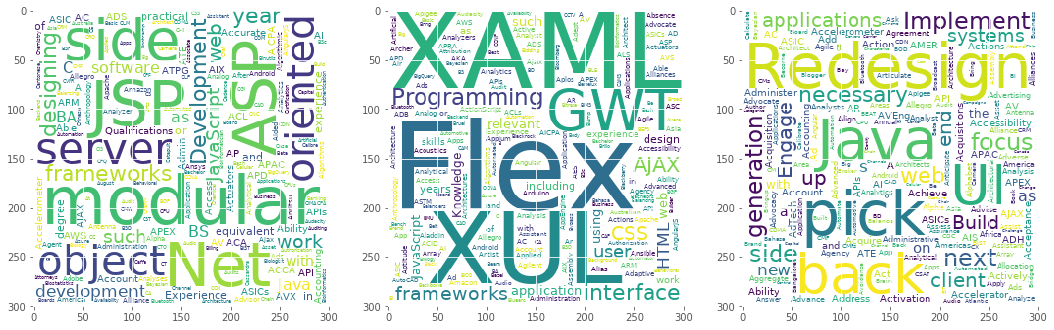

In [43]:
font_path = r'/usr/share/fonts/dejavu/DejaVuSans.ttf'

plt.figure(figsize=(18, 6))

# Minimum Qualification Word Cloud
ax1 = plt.subplot(1, 3, 1)
plot_tfidf_wordcloud(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, height=300, width=300)

# Preferred Qualification Word Cloud
ax2 = plt.subplot(1, 3, 2)
plot_tfidf_wordcloud(pref_qual_tfidfm, text_index=0, ax=ax2, font_path=font_path, height=300, width=300)

# Responsibilities Word Cloud
ax3 = plt.subplot(1, 3, 3)
plot_tfidf_wordcloud(resp_tfidfm, text_index=0, ax=ax3, font_path=font_path, height=300, width=300)

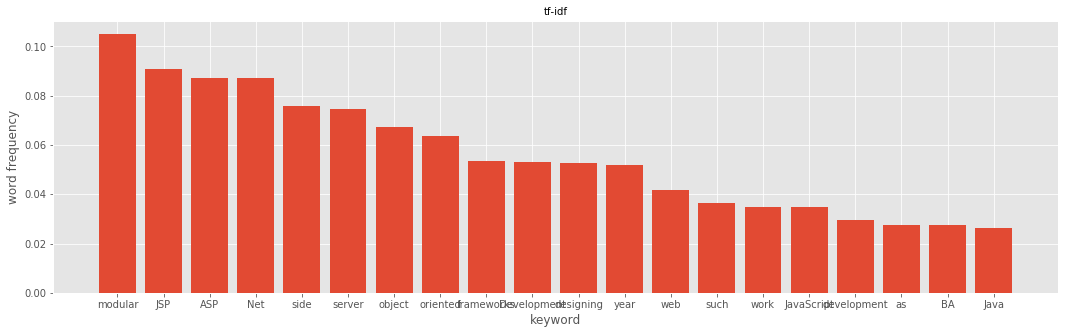

In [49]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Minimum Qualifications'
plot_tfidf_bar(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, title=title)

Top keywords in Minimum Qualifications could be: `modular`, `JSP`, `ASP`, `server side`, `object oriented`, `web development`, `JavaScript`, `Java`

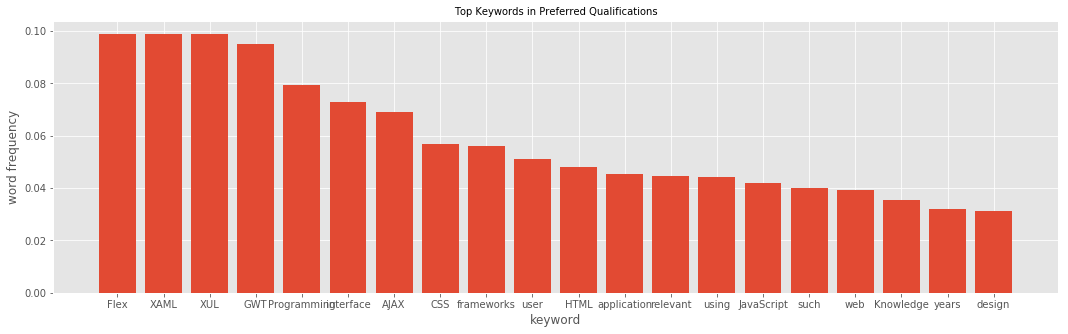

In [52]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Preferred Qualifications'
plot_tfidf_bar(pref_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, title=title)

Top keywords in Preferred Qualifications could be: `Flex`, `XAML`, `XUL`, `GWT`, `user interface design`, `AJAX`, `CSS`, `HTML`, `JavaScript`, `web application`

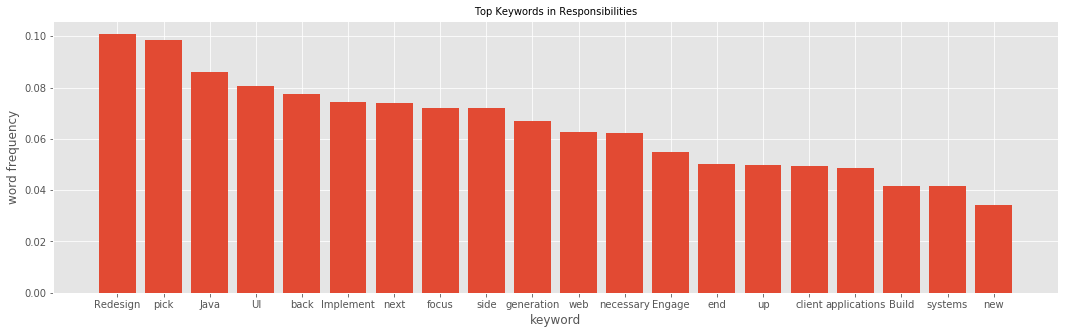

In [54]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Responsibilities'
plot_tfidf_bar(resp_tfidfm, text_index=0, ax=ax1, font_path=font_path, title=title)

Top keywords in Preferred Qualifications could be: `UI Redesign`, `Java`, `next generation`, `back-end`